# Mental Health Data Analysis - Extended Notebook

In this Notebook you will find:
- All the Data Exploration code I used to do the project.
- All functions written here, before being reallocated to their respective module.
- All encoders/scalers/transformers/models are stored in pickle files.
- Additional comments in some code cells.

This way you will be able to see all my code on the same document.

# Brief Table of Contents:

This Notebook consists mainly of 3 different parts:

- Data Cleaning and Wrangling
- Logistic Regression Machine Learning comparing 2 models
- Hypothesis Testing

## Importing the Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
import pickle

%matplotlib inline

## Reading the file to get the DataFrame

In [7]:
survey = pd.read_csv('/Users/Hector_Martin/Documents/Data Analysis/Bootcamp/mental_health_data_analysis/data/survey.csv')
pd.set_option('display.max_columns', None)

## Inspecting our DataFrame

In [8]:
survey

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [9]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Most of our columns are Categorical.

In [10]:
survey.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

We've got NaN values in 4 columns.

In [11]:
for column in survey.columns:
    print(column, survey[column].unique())

Timestamp ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Fem

## Standardizing the Column names:

Setting all names in lowercase

In [12]:
survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [13]:
cols = []
for column in survey.columns:
    cols.append(column.lower())#fill in the list with all column names in lowercase
survey.columns = cols#replace the dataframe columns with the columns stored in the list
survey.head(5)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


The standardardization has been succesfully applied on all column names.

## Dealing with NaN values:

In [14]:
survey.isna().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Dropping 'Timestamp' column:

In [15]:
survey = survey.drop(['timestamp'], axis =1)

### Dropping 'Comments' column:

Most of them are NaN values.

In [16]:
survey = survey.drop(['comments'], axis =1)

### Dropping 'State' column:

There are othe countries apart USA and also because USA rows also contain NaNs

In [17]:
survey = survey.drop(['state'], axis =1)

### Filling the rest of NaN values as 'Unknown':

Since this DataFrame is based on interviews, we can assume that the interviewees decided not to answer.

In [18]:
survey = survey.fillna('Unknown')

In [19]:
survey.isna().sum()

age                          0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

The NaN values are already gone.

## Checking Column values more deeply

In [20]:
for col in survey.columns:
    print(col, survey[col].value_counts(dropna=False))

age  29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

In [21]:
def countplot(df):

    df2 = df.select_dtypes(include = object)
    for column in df2.columns:
        plt.subplots(figsize=(12,4))
        sns.countplot(x= column, data= df2, palette="Set2");
        plt.show()

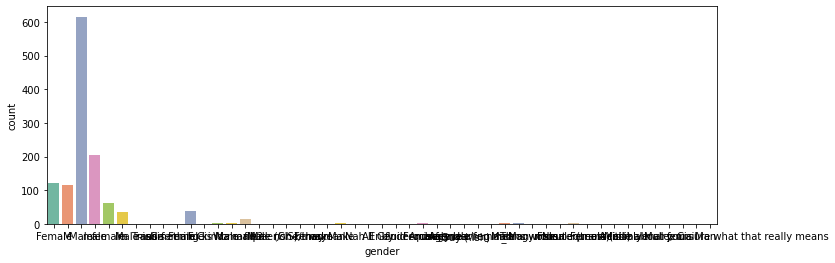

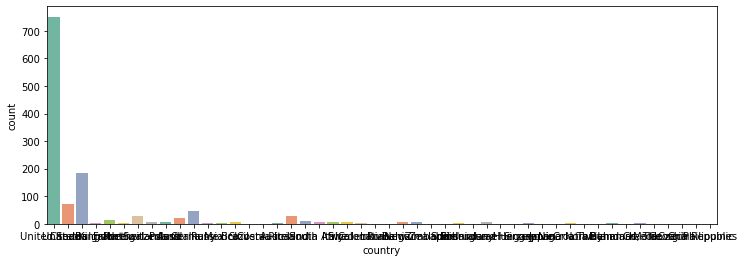

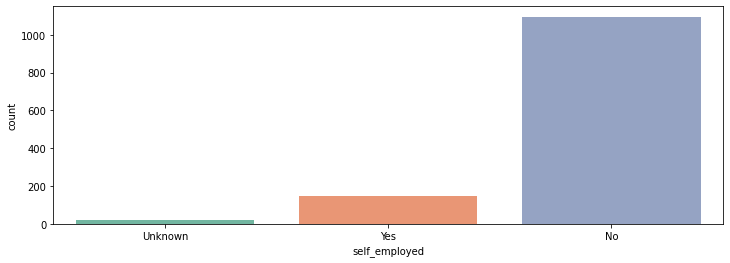

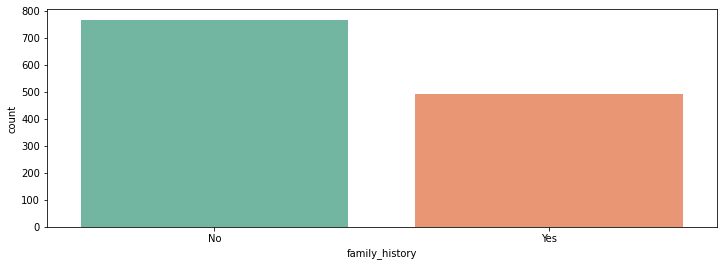

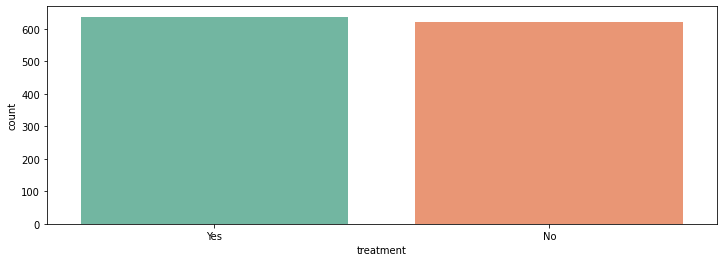

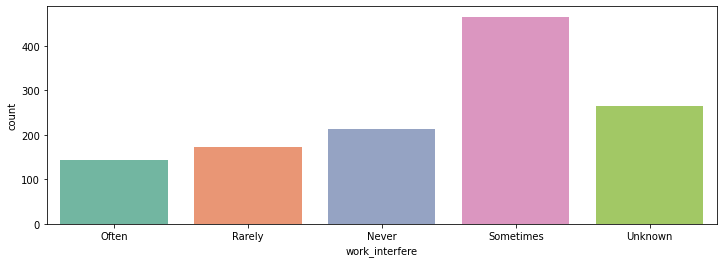

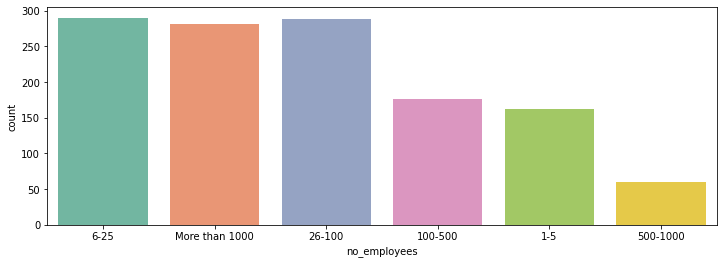

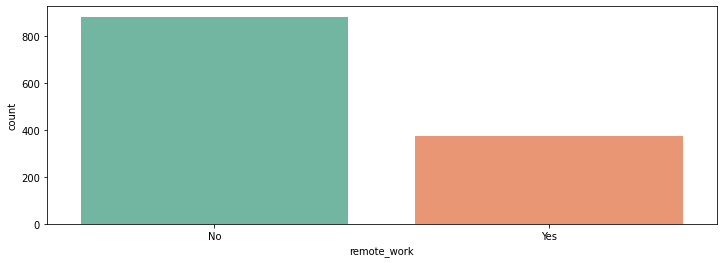

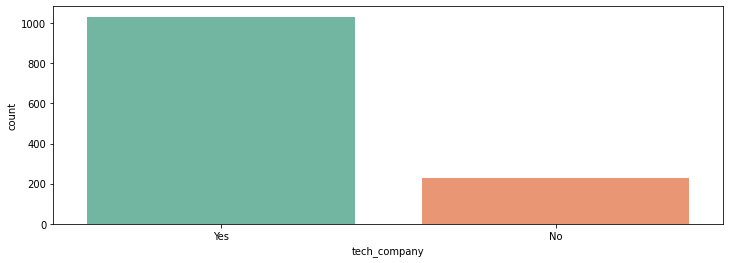

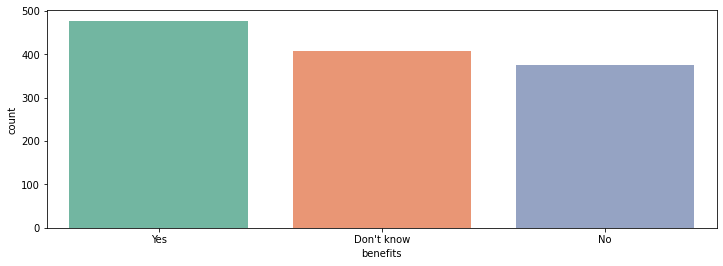

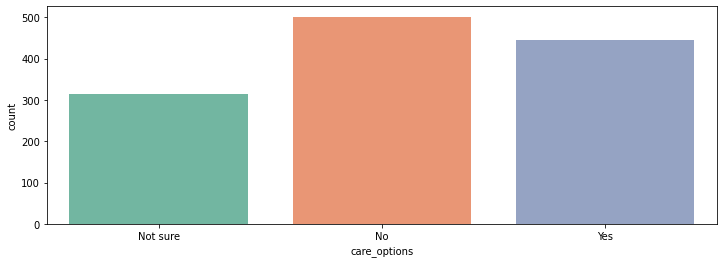

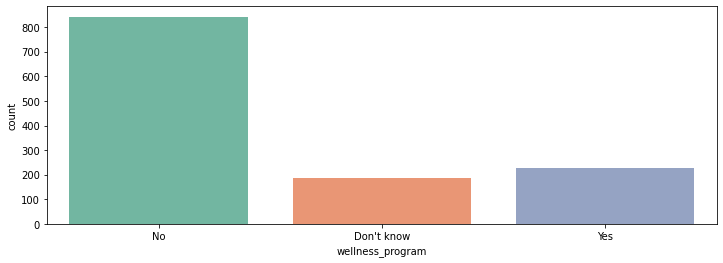

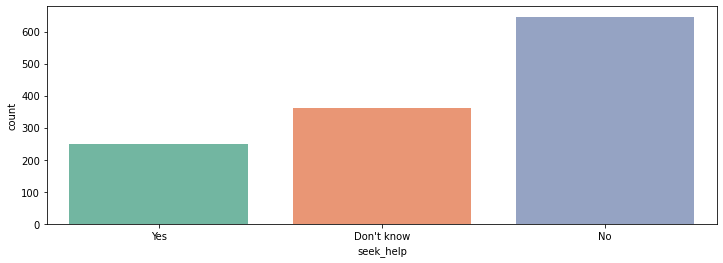

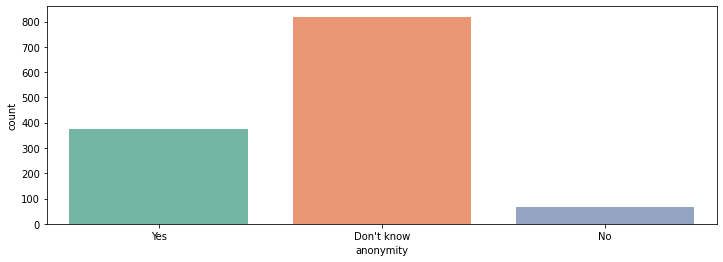

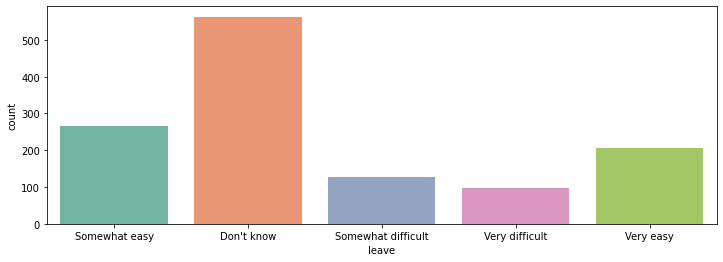

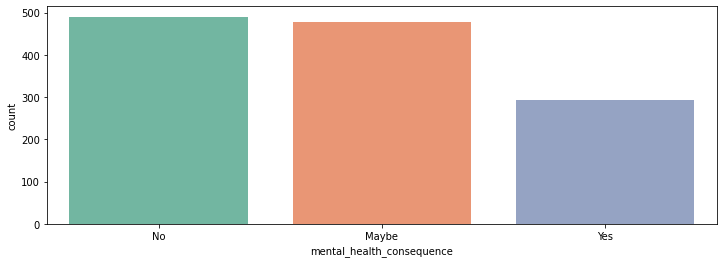

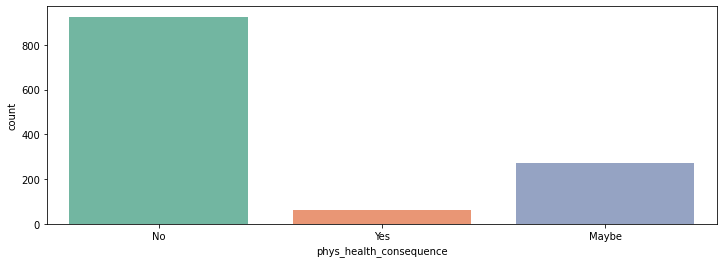

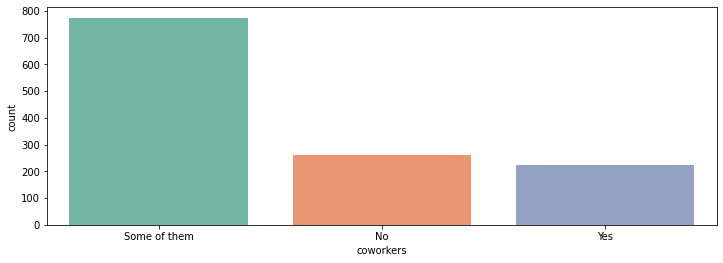

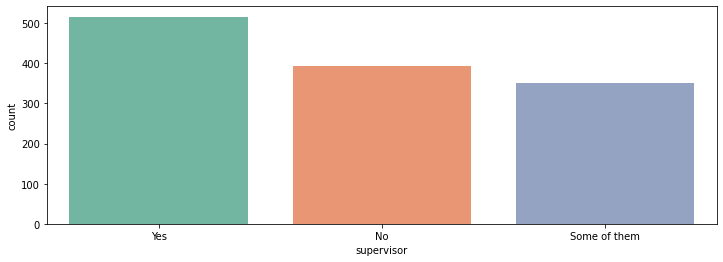

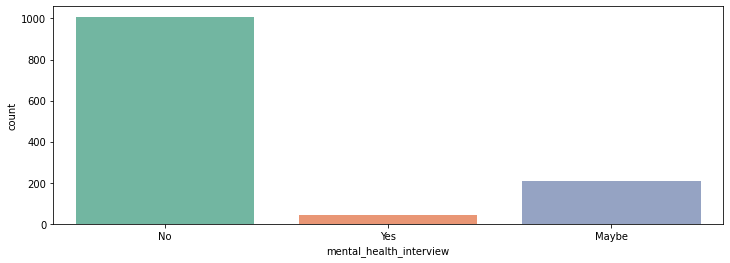

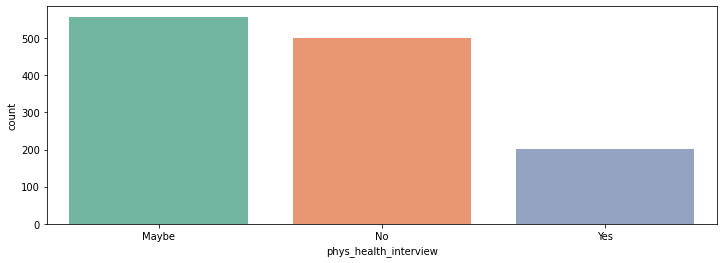

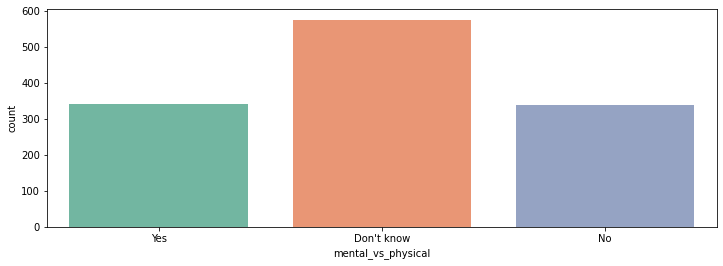

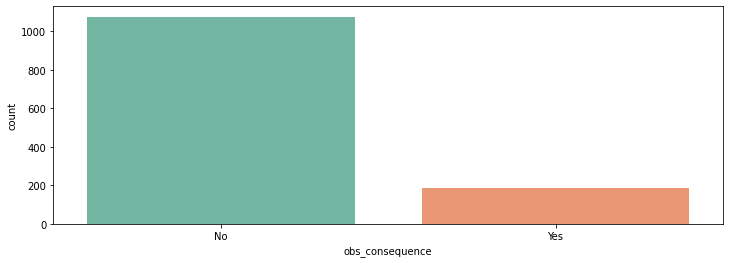

In [22]:
countplot(survey)

'Gender' and 'country' columns contain multiple labels that are severely underrepresented, we will have to balance those columns

In [23]:
def boxplotting (df):
    cols = []
    df2 = df.select_dtypes(include = np.number)
    for column in df2.columns:
        cols.append(column)
    for col in cols:
        sns.boxplot(x = df2[col])
        plt.show()

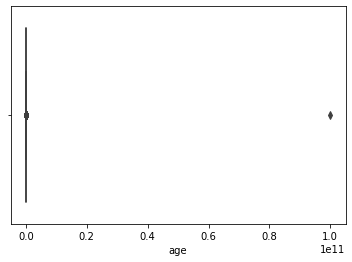

In [24]:
boxplotting(survey)

We can see that the Distribution on 'age' is highly skewed due to the fact that it contains erroneous values.

## Balancing values in Categorical columns:

As seen above, there are some Categorical columns that contain a high density of values that are underrepresented, let's balance those ones.

### Balancing and standardizing the 'gender' column:

The column is full of typos and inconsistent terms to refer to the same gender, apart from that there are gender groups that are clearly underrepresented with just 1 or 2 samples as shown below, therefore we will:

- Reduce the gender groups to Female, Male and Other.
- Replace inconsistencies and typos to refer to Female and Male gender groups.
 

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

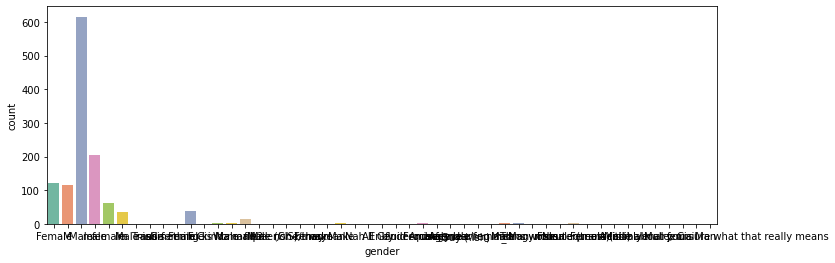

In [25]:
print(survey['gender'].value_counts())
plt.subplots(figsize=(12,4))
sns.countplot(x= 'gender', data= survey, palette="Set2")
plt.show()

Let's start capitalizing the first letter of each term to ease the standardization:


In [26]:
survey['gender'] = survey['gender'].str.capitalize()

In [27]:
def gender_standardize(x):
    females = ['Female','female','Woman','woman','Femake','Femail','femme','F']
    males = ['M','Male','Maile','male','Mal','Make','Man','Msle','Mail','Malr','man']
    found_female = False
    found_male = False
    for elem in females:
        if ( elem in x ):
            return "Female"
            found_female = True
            break
    if ( found_female == False ):
        for elem in males:
            if ( elem in x ):
                return "Male"
                found_male = True
                break
    if ( (found_female == False) and (found_male == False) ):
        return "Other"
        

survey['gender'] = survey['gender'].apply(gender_standardize)         

Male      994
Female    252
Other      13
Name: gender, dtype: int64


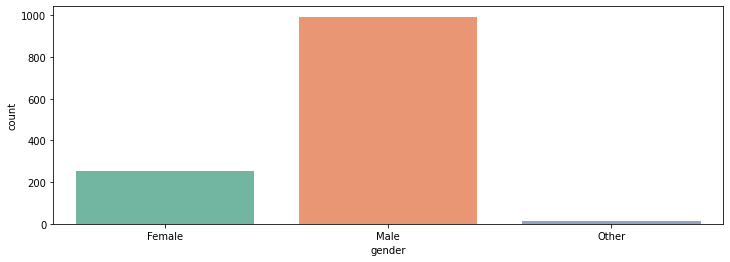

In [28]:
print(survey['gender'].value_counts())
plt.subplots(figsize=(12,4))
sns.countplot(x= 'gender', data= survey, palette="Set2")
plt.show()

We can see that the standardization has been successfully applied.

### Balancing the 'country' column:
Several countries are clearly underrepresented as shown below. Let's amend the issue by putting these ones under the 'Other' label.

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

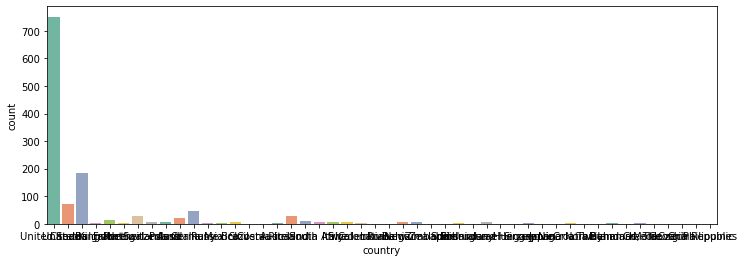

In [29]:
print(survey['country'].value_counts())
plt.subplots(figsize=(12,4))
sns.countplot(x= 'country', data= survey, palette="Set2")
plt.show()

#### Storing the value counts per country and filter those values that have less than 10 samples

In [30]:
count_countries = survey['country'].value_counts()
small_countries = list(count_countries[count_countries < 10].index)
small_countries

['New Zealand',
 'Poland',
 'Switzerland',
 'Sweden',
 'Italy',
 'South Africa',
 'Belgium',
 'Brazil',
 'Israel',
 'Singapore',
 'Bulgaria',
 'Austria',
 'Finland',
 'Mexico',
 'Russia',
 'Denmark',
 'Greece',
 'Colombia',
 'Croatia',
 'Portugal',
 'Moldova',
 'Georgia',
 'Bahamas, The',
 'China',
 'Thailand',
 'Czech Republic',
 'Norway',
 'Romania',
 'Nigeria',
 'Japan',
 'Hungary',
 'Bosnia and Herzegovina',
 'Uruguay',
 'Spain',
 'Zimbabwe',
 'Latvia',
 'Costa Rica',
 'Slovenia',
 'Philippines']

#### Grouping together underepresented states

In [31]:
def clean_countries(x):
    if x in small_countries:
        return 'Other'
    else:
        return x

In [32]:
survey['country'] = survey['country'].apply(clean_countries)

United States     751
United Kingdom    185
Other             108
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: country, dtype: int64


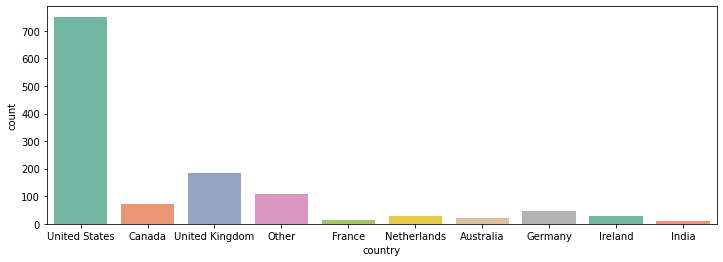

In [33]:
print(survey['country'].value_counts())
plt.subplots(figsize=(12,4))
sns.countplot(x= 'country', data= survey, palette="Set2")
plt.show()

Now this looks better.

## Balancing and standardizing the 'age' column:

In [34]:
survey['age'].value_counts(dropna=False)

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

#### Removing invalid values:
We can see that the column Age has several invalid values. We need to replace them:

In [35]:
#Creating the list of values to replace and storing those in a list
remove = [99999999999,-1726,-29, -1,5,8,11,329]

#Creating a variable for the mean of the column, excluding the faulty values
filtered_mean = survey[survey['age'].isin(remove) == False]['age'].mean()
filtered_mean

32.07673860911271

In [36]:
#if the values of age are in "remove", then apply filtered mean, if not, apply the original value of the column 
survey['age'] = np.where(survey['age'].isin(remove), filtered_mean, survey['age'])

In [37]:
survey['age'].value_counts()

29.000000    85
32.000000    82
26.000000    75
27.000000    71
33.000000    70
28.000000    68
31.000000    67
34.000000    65
30.000000    63
25.000000    61
35.000000    55
23.000000    51
24.000000    46
37.000000    43
38.000000    39
36.000000    37
39.000000    33
40.000000    33
43.000000    28
22.000000    21
41.000000    21
42.000000    20
21.000000    16
46.000000    12
45.000000    12
44.000000    11
19.000000     9
32.076739     8
18.000000     7
50.000000     6
48.000000     6
20.000000     6
51.000000     5
56.000000     4
49.000000     4
57.000000     3
55.000000     3
54.000000     3
47.000000     2
60.000000     2
58.000000     1
62.000000     1
65.000000     1
53.000000     1
61.000000     1
72.000000     1
Name: age, dtype: int64

#### Removing decimals:
After applying the Mean to the column, all values within have several decimals, we are going to remove those ones too:

In [38]:
import math
trunc = lambda x: math.trunc(1000000 * x) / 1000000;
survey[['age']].applymap(trunc)

survey['age'] = survey['age'].apply(np.int64)
survey['age'].value_counts()

32    90
29    85
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: age, dtype: int64

#### Transforming the values into Integers

In [39]:
survey['age'] = survey['age'].apply(np.int64)
survey['age'].value_counts()

32    90
29    85
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: age, dtype: int64

In [40]:
def plot_num (df):
    cols =[]
    df2 = df.select_dtypes(include = np.number)
    for column in df2.columns:
        cols.append(column)   
        sns.displot(df2[cols]);
        plt.show()
        cols.pop()

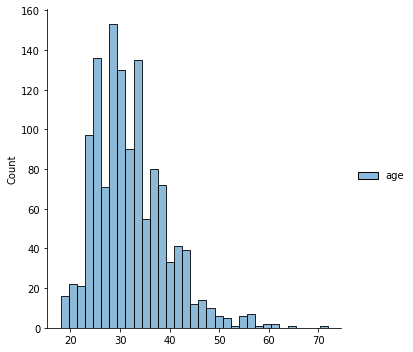

In [41]:
plot_num(survey)

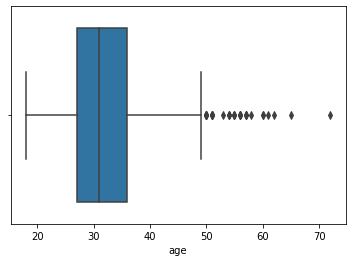

In [42]:
boxplotting(survey)

Now the distribution looks more Gaussian. We will leave the outliers as they are because we are going to do some Exploratory Data Analysis on Tableau.

## Creating a copy of Dataframe for Data Visualization on Tableau:
Now that our DataFrame is clean, let's store it in a csv file to work with it later on Tableau.

In [84]:
survey_model = survey.copy()
survey.to_csv('data/survey_updated.csv', index=False)

## Logistic Regression Model:

Our goal is to predict whether an employee will seek for Mental therapy or not. 

We will compare the results of this model trained with a Dataframe transformed with **MinMax Scaler** against another Model trained with scaled values with **MinMax Scaler** and another one with values transformed with **Power Transformer**

For this purpose we train 2 different models using different scaling and transformation methods:

- **Logistic Regression Model 1**: Trained with MinMax scaler.
- **Logistic Regression Model 2**: Trained with Power Transformer and MinMax scaler.

### Logistic Regression Model with MinMax Scaler:

#### X-y Split:

In [44]:
y = survey[['treatment']]
X = survey.drop(['treatment'], axis=1)

#### Checking the Class imbalance on y:

Yes    637
No     622
Name: treatment, dtype: int64


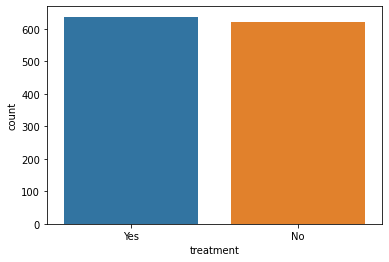

In [45]:
count_classes = y['treatment'].value_counts()
print(count_classes)
sns.countplot(x = 'treatment', data = y);
plt.show()

There is no class imbalance on y, this is really good news because we will not need to any Downsampling or Oversampling.

#### Train-Test split:

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

#Transform NUMPY ARRAYS into dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

#### Numerical and Categorical split:

In [47]:
X_train_num = X_train_df.select_dtypes(np.number)
X_test_num  = X_test_df.select_dtypes(np.number)
X_train_cat = X_train_df.select_dtypes(object)
X_test_cat  = X_test_df.select_dtypes(object)

In [48]:
display(X_train.head())
display(X_test.head())

,age,gender,country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
310,25,Male,Canada,No,No,Often,6-25,Yes,No,Don't know,No,No,Don't know,Don't know,Somewhat difficult,Yes,Maybe,No,No,No,Maybe,Don't know,No
1191,34,Male,Canada,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No
1013,38,Female,United States,No,Yes,Sometimes,26-100,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
1098,29,Male,United States,No,No,Unknown,More than 1000,No,No,Don't know,Not sure,Yes,Don't know,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
583,35,Male,United States,No,No,Never,6-25,No,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No


,age,gender,country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
386,42,Male,Other,No,No,Never,500-1000,No,Yes,Don't know,Not sure,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No
1077,27,Female,United States,No,Yes,Often,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Very difficult,Maybe,No,Yes,Some of them,No,Maybe,No,Yes
405,26,Male,United States,No,Yes,Unknown,6-25,No,Yes,Yes,Yes,No,Yes,Yes,Very easy,No,No,Some of them,Yes,Maybe,Maybe,No,No
452,30,Male,United States,No,Yes,Often,More than 1000,No,Yes,Yes,Yes,Yes,No,Don't know,Very difficult,Yes,No,Some of them,No,No,No,No,Yes
938,32,Male,United States,No,No,Rarely,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Maybe,No,Some of them,Some of them,No,No,Don't know,No


#### Applying Encoders to Categorical variables:

Let's observe the Unique values per each Categorical column.

In [49]:
for col in X_train_cat.columns:
    print(col, X_train_cat[col].unique())

gender ['Male' 'Female' 'Other']
country ['Canada' 'United States' 'Other' 'Germany' 'United Kingdom' 'Netherlands'
 'Ireland' 'Australia' 'France' 'India']
self_employed ['No' 'Yes' 'Unknown']
family_history ['No' 'Yes']
work_interfere ['Often' 'Sometimes' 'Unknown' 'Never' 'Rarely']
no_employees ['6-25' 'More than 1000' '26-100' '1-5' '100-500' '500-1000']
remote_work ['Yes' 'No']
tech_company ['No' 'Yes']
benefits ["Don't know" 'Yes' 'No']
care_options ['No' 'Not sure' 'Yes']
wellness_program ['No' 'Yes' "Don't know"]
seek_help ["Don't know" 'Yes' 'No']
anonymity ["Don't know" 'Yes' 'No']
leave ['Somewhat difficult' "Don't know" 'Somewhat easy' 'Very easy'
 'Very difficult']
mental_health_consequence ['Yes' 'Maybe' 'No']
phys_health_consequence ['Maybe' 'No' 'Yes']
coworkers ['No' 'Some of them' 'Yes']
supervisor ['No' 'Yes' 'Some of them']
mental_health_interview ['No' 'Maybe' 'Yes']
phys_health_interview ['Maybe' 'No' 'Yes']
mental_vs_physical ["Don't know" 'Yes' 'No']
obs_consequ

##### Ordinal and Nominal split:

In [50]:
#X_train:
X_train_cat_nom = X_train_cat.drop(['no_employees', 'leave', 'work_interfere'], axis =1)
X_train_cat_ord = X_train_cat[['no_employees', 'leave', 'work_interfere']]

display(X_train_cat_nom.head())
display(X_train_cat_ord.head())

#X_test:
X_test_cat_nom = X_test_cat.drop(['no_employees', 'leave', 'work_interfere'], axis =1)
X_test_cat_ord = X_test_cat[['no_employees', 'leave', 'work_interfere']]

display(X_test_cat_nom.head())
display(X_test_cat_ord.head())

,gender,country,self_employed,family_history,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
310,Male,Canada,No,No,Yes,No,Don't know,No,No,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No
1191,Male,Canada,No,Yes,No,Yes,Yes,Not sure,Yes,Yes,Yes,Maybe,No,No,No,No,Maybe,Don't know,No
1013,Female,United States,No,Yes,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
1098,Male,United States,No,No,No,No,Don't know,Not sure,Yes,Don't know,Yes,No,No,Some of them,Yes,No,Maybe,Yes,No
583,Male,United States,No,No,No,Yes,No,Yes,No,No,Yes,No,No,Some of them,Yes,Maybe,Maybe,Yes,No


,no_employees,leave,work_interfere
310,6-25,Somewhat difficult,Often
1191,More than 1000,Don't know,Sometimes
1013,26-100,Don't know,Sometimes
1098,More than 1000,Somewhat easy,Unknown
583,6-25,Very easy,Never


,gender,country,self_employed,family_history,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
386,Male,Other,No,No,No,Yes,Don't know,Not sure,No,No,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No
1077,Female,United States,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Maybe,No,Yes,Some of them,No,Maybe,No,Yes
405,Male,United States,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Some of them,Yes,Maybe,Maybe,No,No
452,Male,United States,No,Yes,No,Yes,Yes,Yes,Yes,No,Don't know,Yes,No,Some of them,No,No,No,No,Yes
938,Male,United States,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Maybe,No,Some of them,Some of them,No,No,Don't know,No


,no_employees,leave,work_interfere
386,500-1000,Don't know,Never
1077,More than 1000,Very difficult,Often
405,6-25,Very easy,Unknown
452,More than 1000,Very difficult,Often
938,More than 1000,Somewhat easy,Rarely


##### Creating a list of lists of all the Unique values of the Categorical Nominal columns:

In [51]:
categories = [ list(survey[col].unique()) for col in X_train_cat_nom.columns ]
categories

[['Female', 'Male', 'Other'],
 ['United States',
  'Canada',
  'United Kingdom',
  'Other',
  'France',
  'Netherlands',
  'Australia',
  'Germany',
  'Ireland',
  'India'],
 ['Unknown', 'Yes', 'No'],
 ['No', 'Yes'],
 ['No', 'Yes'],
 ['Yes', 'No'],
 ['Yes', "Don't know", 'No'],
 ['Not sure', 'No', 'Yes'],
 ['No', "Don't know", 'Yes'],
 ['Yes', "Don't know", 'No'],
 ['Yes', "Don't know", 'No'],
 ['No', 'Maybe', 'Yes'],
 ['No', 'Yes', 'Maybe'],
 ['Some of them', 'No', 'Yes'],
 ['Yes', 'No', 'Some of them'],
 ['No', 'Yes', 'Maybe'],
 ['Maybe', 'No', 'Yes'],
 ['Yes', "Don't know", 'No'],
 ['No', 'Yes']]

##### Applying One Hot Encoder to Categorical Nominal variables:

In [52]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = categories )

#X_train:
encoder.fit(X_train_cat_nom) 
X_train_cat_nom_encoded = encoder.transform(X_train_cat_nom).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat_nom.columns)
X_train_cat_nom_encoded_df = pd.DataFrame(X_train_cat_nom_encoded, columns=cols, index = X_train_cat_nom.index)
display(X_train_cat_nom_encoded_df.head())

#X_test:
X_test_cat_nom_encoded = encoder.transform(X_test_cat_nom).toarray()
X_test_cat_nom_encoded_df = pd.DataFrame(X_test_cat_nom_encoded, columns=cols, index = X_test_cat_nom.index )
display(X_test_cat_nom_encoded_df.head())

filename = "encoders/onehotencoder.pkl"
pickle.dump(encoder, open(filename, 'wb'))

,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes
310,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1098,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes
386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
452,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
938,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


##### Applying an Ordinal Encoder to Categorical Ordinal variables on X_train and X_test:

In [53]:
#X_train:

mapping1 = {'1-5':0,'6-25':1, '26-100':2, '100-500': 3, '500-1000': 4, 'More than 1000': 5}
X_train_cat_ord = X_train_cat_ord.replace({'no_employees': mapping1})

mapping3 = {"Don't know":0,'Very easy':1, 'Somewhat easy':2, 'Somewhat difficult':3, 'Very difficult':4}
X_train_cat_ord = X_train_cat_ord.replace({'leave': mapping3})

mapping5 = {"Unknown":0,'Never':1, 'Rarely':2, 'Sometimes':3,'Often':4}
X_train_cat_ord = X_train_cat_ord.replace({'work_interfere': mapping5})

display(X_train_cat_ord.head())


#X_test:

mapping2 = {'1-5':0,'6-25':1, '26-100':2, '100-500': 3, '500-1000': 4, 'More than 1000': 5}
X_test_cat_ord = X_test_cat_ord.replace({'no_employees': mapping2})

mapping4 = {"Don't know":0,'Very easy':1, 'Somewhat easy':2, 'Somewhat difficult':3, 'Very difficult':4}
X_test_cat_ord = X_test_cat_ord.replace({'leave': mapping4})

mapping6 = {"Unknown":0,'Never':1, 'Rarely':2, 'Sometimes':3,'Often':4}
X_test_cat_ord = X_test_cat_ord.replace({'work_interfere': mapping6})

display(X_test_cat_ord.head())


,no_employees,leave,work_interfere
310,1,3,4
1191,5,0,3
1013,2,0,3
1098,5,2,0
583,1,1,1


,no_employees,leave,work_interfere
386,4,0,1
1077,5,4,4
405,1,1,0
452,5,4,4
938,5,2,2


#### Concatenate the DataFrames of both X_train and X_test: 

In [54]:
X_train_treated_df = pd.concat([X_train_num, X_train_cat_nom_encoded_df, X_train_cat_ord], axis =1)
X_test_treated_df = pd.concat([X_test_num, X_test_cat_nom_encoded_df, X_test_cat_ord], axis =1)

#### Applying MinMax Scaler on X_Train and X_Test:

In [55]:
from sklearn.preprocessing import MinMaxScaler

#X_train:
scaler = MinMaxScaler()
scaler.fit(X_train_treated_df) 
X_train_scaled = scaler.transform(X_train_treated_df)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_treated_df.columns, index = X_train_treated_df.index )
display(X_train_scaled_df.head())

#X_test:
X_test_scaled = scaler.transform(X_test_treated_df)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_treated_df.columns, index = X_test_treated_df.index )
display(X_test_scaled_df.head())

#Storing the Scaler in a pickle:
pickle.dump(scaler, open("transformers/minmax_scaler.pkl", 'wb'))

,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
310,0.148936,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.2,0.75,1.00
1191,0.340426,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.75
1013,0.425532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.4,0.00,0.75
1098,0.234043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.00
583,0.361702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.25,0.25


,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
386,0.510638,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.8,0.00,0.25
1077,0.191489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.00
405,0.170213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2,0.25,0.00
452,0.255319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.00,1.00
938,0.297872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.50,0.50


#### Applying a Logistic Regression Model:

In [56]:
from sklearn.linear_model import LogisticRegression

logreg_1 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter = 500)
logreg_1.fit(X_train_scaled_df, y_train.values.ravel())

#saving the model
filename = 'models/min_max_logreg.pkl'
pickle.dump(logreg_1, open(filename,'wb'))

#### Checking predictions for X_Train and X_Test:

In [57]:
y_train_pred_1 = logreg_1.predict(X_train_scaled_df)
y_test_pred_1  = logreg_1.predict(X_test_scaled_df)
print("The first predictions on the TRAIN set are: ",y_train_pred_1[:5])
print("The first predictions on the TEST set are: ",y_test_pred_1[:5])

The first predictions on the TRAIN set are:  ['Yes' 'Yes' 'Yes' 'No' 'No']
The first predictions on the TEST set are:  ['No' 'Yes' 'No' 'Yes' 'Yes']


#### Confusion Matrix:
Let's assess the performance of our model with the Confusion Matrix:

In [58]:
def conf_matrix (y_train, y_train_pred, y_test, y_test_pred, model_name):
   
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(cm_train,display_labels=model_name.classes_);
    disp.plot()
    plt.title('Confusion Matrix for Train Set')
    plt.show()
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(cm_test,display_labels=model_name.classes_);
    disp.plot()
    plt.title('Confusion Matrix for Test Set')
    plt.show()

    return

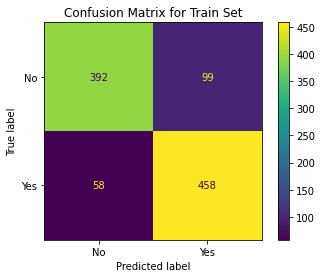

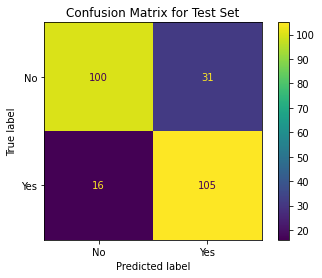

In [59]:
conf_matrix (y_train, y_train_pred_1, y_test, y_test_pred_1, logreg_1)

Based on the results on the Test set, we can see that our model is fairly accurate predicting both labels, especially the Positive one.

#### Scoring:
Assessing the performance of our model more into detail with the scores listed below:

In [60]:
def log_class_scores(y_train, y_train_pred, y_test, y_test_pred, label):
    
    print('ACCURACY SCORE:\n')
    print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
    print("The accuracy in the TEST set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
    print('\n-------------------------------------------------\n')
    print('PRECISSION SCORE:\n')
    print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label=label)))
    print("The precission in the TESTset is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label=label)))
    print('\n-------------------------------------------------\n')
    print('RECALL SCORE:\n')
    print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label=label)))
    print("The recall in the TEST set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label=label)))
    print('\n-------------------------------------------------\n')
    print('F1 SCORE:\n')
    print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label=label)))
    print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label=label)))
    print('\n-------------------------------------------------\n')
    print('KAPPA SCORE:\n')
    print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train,y_train_pred)))
    print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))
    print('\n-------------------------------------------------\n')
    print('CLASSIFICATION REPORT FOR TRAIN SET:\n')
    print(classification_report(y_train, y_train_pred,target_names=['No','Yes']))
    print('\n-------------------------------------------------\n')
    print('CLASSIFICATION REPORT FOR TEST SET:\n')
    print(classification_report(y_test, y_test_pred,target_names=['No','Yes']))

In [61]:
log_class_scores(y_train, y_train_pred_1, y_test, y_test_pred_1, 'No')

ACCURACY SCORE:

The accuracy in the TRAIN set is: 0.844
The accuracy in the TEST set is: 0.813

-------------------------------------------------

PRECISSION SCORE:

The precission in the TRAIN set is: 0.871
The precission in the TESTset is: 0.862

-------------------------------------------------

RECALL SCORE:

The recall in the TRAIN set is: 0.798
The recall in the TEST set is: 0.763

-------------------------------------------------

F1 SCORE:

The F1-score for the TRAIN set is 0.83
The F1-score for the TEST set is 0.81

-------------------------------------------------

KAPPA SCORE:

The Kappa in the TRAIN set is: 0.69
The Kappa in the TEST set is: 0.63

-------------------------------------------------

CLASSIFICATION REPORT FOR TRAIN SET:

              precision    recall  f1-score   support

          No       0.87      0.80      0.83       491
         Yes       0.82      0.89      0.85       516

    accuracy                           0.84      1007
   macro avg       0.85 

After analyzing the metrics we can see that our model:

- Does not suffer from overfitting (Metrics between Train and Test set are quite similar)
- It is very accurate at predicting both Positive and Negative values (Accuracy of 0.81 on Test set)
- It is better at predicting Negative vales when compared with the total number of Negative predictions (Precision of 0.86 vs 0.77 on Test set)
- Nonetheless it is better at predicting True Positive results than True Negative ones (Recall of 0.87 vs 0.76 on Test set)

### Ranking to observe which variables affected the most the model predictions:

In [62]:
logreg_1.coef_[0]
# LR = 1/ (1 + exp-LM)
# LM = b0 + b1 * col1 + b2 * col2 +....

array([ 0.77032617, -0.65969915,  0.85918142, -0.01928524,  0.45874169,
       -0.61853773, -0.06173936, -0.25752655, -0.29644534,  0.0295967 ,
        0.031282  ,  0.22788377,  0.06317873,  0.25839508,  0.96104259,
       -0.04957484, -0.01330898, -0.45577429, -0.58593567,  0.1094273 ,
        0.90837978, -0.02007968, -0.30444702,  0.49685111, -0.05740875,
       -0.3353724 , -0.18962741,  0.19686507,  0.29114884,  0.03988593,
       -0.08038384, -0.4146562 ,  0.55967894,  0.31241056, -0.18814561,
        0.24248044, -0.3725172 ,  0.18777415,  0.3746622 , -0.03751168,
       -0.02564374,  0.44074329, -0.08480687,  0.16603302,  4.73021093])

#### Creating a list of tuples containing the name of the column and the belonging coefficient:
The higher the coefficient, the higher in the ranking, which means that the more influence in the predictions.

In [63]:
#List comprehension of all the coefficients
#First we pass them to Absolute values to be able to sort them properly
#Then we sort them
#Reverse = True to set the order as Descending
rank = [(value, index) for index, value in enumerate(np.abs(logreg_1.coef_[0]).tolist())]
rank.sort(reverse = True)
#rank

#### Replacing the Index by the column name:

In [64]:
[ (X_train_scaled_df.columns[elem[1]], round(elem[0],2)) for elem in rank ]

[('work_interfere', 4.73),
 ('family_history_Yes', 0.96),
 ('care_options_Yes', 0.91),
 ('gender_Other', 0.86),
 ('age', 0.77),
 ('gender_Male', 0.66),
 ('country_Other', 0.62),
 ('benefits_No', 0.59),
 ('coworkers_Yes', 0.56),
 ("seek_help_Don't know", 0.5),
 ('country_United Kingdom', 0.46),
 ("benefits_Don't know", 0.46),
 ('obs_consequence_Yes', 0.44),
 ('coworkers_No', 0.41),
 ('phys_health_interview_Yes', 0.37),
 ('mental_health_interview_Maybe', 0.37),
 ("anonymity_Don't know", 0.34),
 ('supervisor_No', 0.31),
 ('wellness_program_Yes', 0.3),
 ('country_Australia', 0.3),
 ('mental_health_consequence_Yes', 0.29),
 ('self_employed_No', 0.26),
 ('country_Netherlands', 0.26),
 ('mental_health_interview_Yes', 0.24),
 ('country_India', 0.23),
 ('mental_health_consequence_Maybe', 0.2),
 ('anonymity_No', 0.19),
 ('supervisor_Some of them', 0.19),
 ('phys_health_interview_No', 0.19),
 ('leave', 0.17),
 ('care_options_No', 0.11),
 ('no_employees', 0.08),
 ('phys_health_consequence_Maybe', 

#### The top 5 columns with most influence in the predictions is:

- work_interfer
- family_history_Yes
- care_options_Yes
- gender_Other
- age

### Logistic Regression with Power Transformer and MinMax Scaler:

#### Applying the Power Transformer:

In [65]:
from sklearn.preprocessing import PowerTransformer

#X_train:
ptransformer = PowerTransformer()
ptransformer.fit(X_train_treated_df) 
X_train_ptrans = ptransformer.transform(X_train_treated_df)
X_train_ptrans_df = pd.DataFrame(X_train_ptrans, columns=X_train_treated_df.columns, index = X_train_treated_df.index )
display(X_train_ptrans_df.head())

#X_test:
X_test_ptrans = ptransformer.transform(X_test_treated_df)
X_test_ptrans_df = pd.DataFrame(X_test_ptrans, columns=X_test_treated_df.columns, index = X_test_treated_df.index )
display(X_test_ptrans_df.head())

pickle.dump(ptransformer, open("transformers/p_transf.pkl", 'wb'))

,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
310,-1.027057,0.522563,-0.105091,3.806876,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,-0.818525,1.510010,2.107900,1.422682,-0.649859,1.265728,-0.741101,-0.415082,-0.469687,1.576207,-1.021076,0.742710,-0.23097,-0.776855,1.848423,-0.218785,1.984005,2.015019,-0.46021,1.520691,-0.622135,-0.189758,-0.442676,-0.808412,-0.441071,1.071038,-0.599145,-0.415082,-0.764805,1.257849,1.453088
1191,0.431458,0.522563,-0.105091,3.806876,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,1.221710,-0.662247,-0.474406,-0.702898,-0.649859,-0.790059,-0.741101,-0.415082,2.129077,-0.634434,-1.021076,-1.346421,-0.23097,1.287242,-0.541002,-0.218785,-0.504031,2.015019,-0.46021,1.520691,-0.622135,-0.189758,-0.442676,-0.808412,-0.441071,1.071038,-0.599145,-0.415082,1.380003,-1.052942,0.730017
1013,0.920601,-1.913645,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,1.221710,1.510010,-0.474406,1.422682,-0.649859,-0.790059,-0.741101,2.409160,-0.469687,1.576207,-1.021076,0.742710,-0.23097,-0.776855,-0.541002,-0.218785,-0.504031,-0.496273,-0.46021,-0.657596,-0.622135,-0.189758,-0.442676,1.236993,-0.441071,1.071038,-0.599145,-0.415082,-0.091578,-1.052942,0.730017
1098,-0.303135,0.522563,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,-0.818525,-0.662247,2.107900,1.422682,-0.649859,-0.790059,-0.741101,-0.415082,2.129077,1.576207,-1.021076,-1.346421,-0.23097,-0.776855,-0.541002,-0.218785,-0.504031,-0.496273,-0.46021,-0.657596,-0.622135,-0.189758,-0.442676,-0.808412,-0.441071,-0.933674,-0.599145,-0.415082,1.380003,0.853553,-1.486095
583,0.560851,0.522563,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,-0.818525,-0.662247,-0.474406,-0.702898,1.538796,-0.790059,1.349344,-0.415082,-0.469687,-0.634434,0.979359,-1.346421,-0.23097,-0.776855,-0.541002,-0.218785,-0.504031,-0.496273,-0.46021,-0.657596,-0.622135,-0.189758,2.258989,-0.808412,-0.441071,-0.933674,-0.599145,-0.415082,-0.764805,0.221477,-0.736218


,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
386,1.344042,0.522563,-0.105091,-0.262683,-0.411789,3.381139,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,-0.818525,-0.662247,-0.474406,1.422682,-0.649859,-0.790059,-0.741101,-0.415082,-0.469687,-0.634434,0.979359,0.742710,-0.23097,-0.776855,-0.541002,-0.218785,-0.504031,-0.496273,-0.460210,-0.657596,-0.622135,-0.189758,2.258989,-0.808412,-0.441071,1.071038,-0.599145,-0.415082,0.948159,-1.052942,-0.736218
1077,-0.646959,-1.913645,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,1.221710,-0.662247,-0.474406,-0.702898,-0.649859,-0.790059,1.349344,-0.415082,2.129077,-0.634434,-1.021076,-1.346421,-0.23097,1.287242,-0.541002,-0.218785,-0.504031,-0.496273,2.172922,-0.657596,1.607367,-0.189758,-0.442676,-0.808412,-0.441071,-0.933674,1.669046,2.409160,1.380003,1.548404,1.453088
405,-0.832072,0.522563,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,1.221710,-0.662247,-0.474406,-0.702898,-0.649859,-0.790059,1.349344,-0.415082,-0.469687,-0.634434,-1.021076,-1.346421,-0.23097,-0.776855,-0.541002,-0.218785,-0.504031,-0.496273,-0.460210,-0.657596,-0.622135,-0.189758,2.258989,-0.808412,-0.441071,-0.933674,1.669046,-0.415082,-0.764805,0.221477,-1.486095
452,-0.143042,0.522563,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,1.221710,-0.662247,-0.474406,-0.702898,-0.649859,-0.790059,1.349344,-0.415082,2.129077,-0.634434,0.979359,0.742710,-0.23097,-0.776855,1.848423,-0.218785,-0.504031,-0.496273,-0.460210,1.520691,-0.622135,-0.189758,-0.442676,1.236993,-0.441071,-0.933674,1.669046,2.409160,1.380003,1.548404,1.453088
938,0.156418,0.522563,-0.105091,-0.262683,-0.411789,-0.295758,-0.114361,-0.145939,-0.14235,-0.203384,-0.149449,-0.094963,-0.367814,0.390095,-0.818525,-0.662247,-0.474406,-0.702898,-0.649859,-0.790059,1.349344,-0.415082,2.129077,-0.634434,-1.021076,-1.346421,-0.23097,1.287242,-0.541002,-0.218785,-0.504031,-0.496273,-0.460210,-0.657596,1.607367,-0.189758,-0.442676,1.236993,-0.441071,1.071038,-0.599145,-0.415082,1.380003,0.853553,0.000962


#### Applying the MinMax Scaler:

In [66]:
#X_train:

ptrans_scaler = MinMaxScaler()
ptrans_scaler.fit(X_train_ptrans_df) 
X_train_ptsc = ptrans_scaler.transform(X_train_ptrans_df)
X_train_ptsc_df = pd.DataFrame(X_train_ptsc, columns=X_train_ptrans_df.columns, index = X_train_ptrans_df.index )
display(X_train_ptsc_df.head())

#X_test:
X_test_ptsc= ptrans_scaler.transform(X_test_ptrans_df)
X_test_ptsc_df = pd.DataFrame(X_test_ptsc, columns=X_test_ptrans_df.columns, index = X_test_ptrans_df.index )
display(X_test_ptsc_df.head())

pickle.dump(ptrans_scaler, open("transformers/ptrans_minmax.pkl", 'wb'))

,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
310,0.300830,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.296680,0.888306,1.000000
1191,0.552952,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.753989
1013,0.637506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.517443,0.000000,0.753989
1098,0.425968,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.732888,0.000000
583,0.575319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.296680,0.489908,0.255131


,age,gender_Male,gender_Other,country_Canada,country_United Kingdom,country_Other,country_France,country_Netherlands,country_Australia,country_Germany,country_Ireland,country_India,self_employed_Yes,self_employed_No,family_history_Yes,remote_work_Yes,tech_company_No,benefits_Don't know,benefits_No,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_Yes,seek_help_Don't know,seek_help_No,anonymity_Don't know,anonymity_No,mental_health_consequence_Maybe,mental_health_consequence_Yes,phys_health_consequence_Yes,phys_health_consequence_Maybe,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,mental_health_interview_Yes,mental_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,obs_consequence_Yes,no_employees,leave,work_interfere
386,0.710703,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.858391,0.000000,0.255131
1077,0.366534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000
405,0.334535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.296680,0.489908,0.000000
452,0.453642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000
938,0.505408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.732888,0.505942


#### Applying a Logistic Regression Model:

In [67]:
from sklearn.linear_model import LogisticRegression

logreg_2 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter = 500)
logreg_2.fit(X_train_ptsc_df, y_train.values.ravel())

#saving the model
filename = 'models/ptrans_minmax_logreg.pkl'
pickle.dump(logreg_2, open(filename,'wb'))

#### Checking predictions for X_Train and X_Test:

In [68]:
y_train_pred_2 = logreg_2.predict(X_train_ptsc_df)
y_test_pred_2  = logreg_2.predict(X_test_ptsc_df)
print("The first predictions on the TRAIN set are: ",y_train_pred_2[:5])
print("The first predictions on the TEST set are: ",y_test_pred_2[:5])

The first predictions on the TRAIN set are:  ['Yes' 'Yes' 'Yes' 'No' 'No']
The first predictions on the TEST set are:  ['No' 'Yes' 'No' 'Yes' 'Yes']


#### Confusion Matrix:
Comparing the results between the Confusion Matrix of the first Logistic Regression Model and this one:

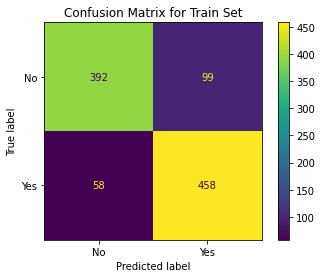

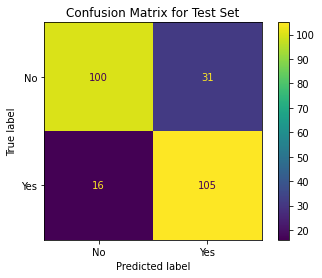

In [69]:
#Logistic Regression Model 1:

conf_matrix (y_train, y_train_pred_1, y_test, y_test_pred_1, logreg_1)

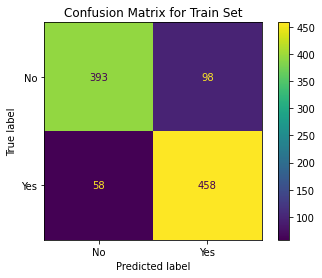

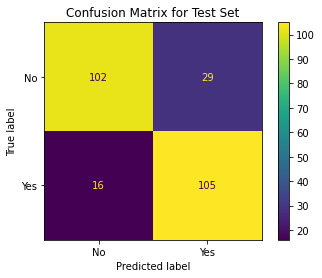

In [70]:
#Logistic Regression Model 2:

conf_matrix (y_train, y_train_pred_2, y_test, y_test_pred_2, logreg_2)

The performance has slightly improved, our second model has predicted correctly 2 more Negative values than before.

#### Scoring:

We are going to display all the metrics for the new model, alongside the Classification report and we will compare this last one between the previous model and the latest on the Test set.

In [71]:
log_class_scores(y_train, y_train_pred_2, y_test, y_test_pred_2, 'No')

ACCURACY SCORE:

The accuracy in the TRAIN set is: 0.845
The accuracy in the TEST set is: 0.821

-------------------------------------------------

PRECISSION SCORE:

The precission in the TRAIN set is: 0.871
The precission in the TESTset is: 0.864

-------------------------------------------------

RECALL SCORE:

The recall in the TRAIN set is: 0.800
The recall in the TEST set is: 0.779

-------------------------------------------------

F1 SCORE:

The F1-score for the TRAIN set is 0.83
The F1-score for the TEST set is 0.82

-------------------------------------------------

KAPPA SCORE:

The Kappa in the TRAIN set is: 0.69
The Kappa in the TEST set is: 0.64

-------------------------------------------------

CLASSIFICATION REPORT FOR TRAIN SET:

              precision    recall  f1-score   support

          No       0.87      0.80      0.83       491
         Yes       0.82      0.89      0.85       516

    accuracy                           0.85      1007
   macro avg       0.85 

In [72]:
print('CLASSIFICATION REPORT FOR TEST SET ON LOGISTIC REGRESSION 1:\n')
print(classification_report(y_test, y_test_pred_1,target_names=['No','Yes']))

CLASSIFICATION REPORT FOR TEST SET ON LOGISTIC REGRESSION 1:

              precision    recall  f1-score   support

          No       0.86      0.76      0.81       131
         Yes       0.77      0.87      0.82       121

    accuracy                           0.81       252
   macro avg       0.82      0.82      0.81       252
weighted avg       0.82      0.81      0.81       252



We can see that the results are practically identical on both models.

#### Ranking the variables with most relevance for the predictions:
Creating a list of tuples containing the name of the column and the belonging coefficient:

In [73]:
rank2 = [(value, index) for index, value in enumerate(np.abs(logreg_2.coef_[0]).tolist())] 
rank2.sort(reverse = True)
#rank2

Replacing the Index by the column name:

In [74]:
[ (X_train_ptsc_df.columns[elem[1]], round(elem[0],2)) for elem in rank2 ]

[('work_interfere', 4.74),
 ('family_history_Yes', 0.96),
 ('care_options_Yes', 0.91),
 ('gender_Other', 0.85),
 ('gender_Male', 0.65),
 ('country_Other', 0.62),
 ('benefits_No', 0.57),
 ('coworkers_Yes', 0.56),
 ('age', 0.5),
 ("seek_help_Don't know", 0.49),
 ("benefits_Don't know", 0.45),
 ('country_United Kingdom', 0.45),
 ('obs_consequence_Yes', 0.45),
 ('coworkers_No', 0.41),
 ('mental_health_interview_Maybe', 0.38),
 ('phys_health_interview_Yes', 0.37),
 ("anonymity_Don't know", 0.33),
 ('country_Australia', 0.32),
 ('wellness_program_Yes', 0.31),
 ('supervisor_No', 0.3),
 ('mental_health_consequence_Yes', 0.29),
 ('mental_health_interview_Yes', 0.25),
 ('country_Netherlands', 0.25),
 ('self_employed_No', 0.25),
 ('country_India', 0.22),
 ('supervisor_Some of them', 0.2),
 ('mental_health_consequence_Maybe', 0.2),
 ('anonymity_No', 0.18),
 ('phys_health_interview_No', 0.18),
 ('care_options_No', 0.11),
 ('leave', 0.08),
 ('self_employed_Yes', 0.08),
 ('phys_health_consequence_May

 The top 5 columns with most influence in the predictions is:

- work_interfere
- family_history_Yes
- care_options_Yes
- gender_Other
- gender_Male'

## Hypothesis Testing:

We are going to test whether the **Mean of the age** of **people who seek for mental treatment** is different or not to the mean of age of people that does not:

 - Our **Null Hypothesis** will be that the Mean of age is the **same**.
 - On the other hand, our **Alternative Hypothesis**  will be that the Mean of age is **different**.
 
Since the Mean could be higher or lower reason we will perform a **Two-sided test**.

We will accept or reject the Null Hypothesis by comparing the **p-value** against the area of the of the distribution, in this case **Alpha/2**.

### Finding our data: 

Let's start by searching for the Mean of the Age of people seeking for Mental Treatment and the Size of those 2 samples. We will be using the same Dataframe we used to train the models before applying any Transformer or Encoder.

In [75]:
survey_model

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Unknown,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,Unknown,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Unknown,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Unknown,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Unknown,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,Unknown,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [76]:
mean_age = survey_model.groupby(['treatment']).agg({'age':np.mean, 'country' : 'count' }).reset_index()
mean_age

,treatment,age,country
0,No,31.536977,622
1,Yes,32.602826,637


The 'country' column actually stores the size of the sample.

### Storing the values in their corresponding variables:

In [77]:
#For the mean of the age of people who did or did not seek for mental treatment:

mean_age_no = mean_age.iloc[0,1]
mean_age_no= round(mean_age_no,2)
mean_age_yes = mean_age.iloc[1,1]
mean_age_yes= round(mean_age_yes,2)

#For the size of the of both samples:

size_mean_no = mean_age.iloc[0,2]
size_mean_yes = mean_age.iloc[1,2]

print('The Mean of age of people who have not sought for mental treatment is:', mean_age_no)
print('The Mean of age of people who have sought for mental treatment is:', mean_age_yes)
print('The Size of the sample who have not sought for mental treatment is:', size_mean_no)
print('The Size of the sample who have sought for mental treatment is:', size_mean_yes)

The Mean of age of people who have not sought for mental treatment is: 31.54
The Mean of age of people who have sought for mental treatment is: 32.6
The Size of the sample who have not sought for mental treatment is: 622
The Size of the sample who have sought for mental treatment is: 637


### Calculating the **Standard Deviation** of each samples:

In [78]:
n1 = np.std(survey[survey_model['treatment'] == "No"]['age'],ddof = 1) # n, n - 1; s1
n1 = round(n1, 2)

n2 = np.std(survey[survey_model['treatment'] == "Yes"]['age'],ddof = 1) # s2
n2 = round(n2, 2)

print('The Standard Deviation of the sample that have not sought for mental treatment is:',n1)
print('The Standard Deviation of the sample that have sought for mental treatment is:',n2)

The Standard Deviation of the sample that have not sought for mental treatment is: 6.95
The Standard Deviation of the sample that have sought for mental treatment is: 7.53


Then, let's calculate the **Statistic** based on the results we got from both samples:

In [79]:
Z = (mean_age_no - mean_age_yes)/np.sqrt((n1**2/size_mean_no)+(n2**2/size_mean_yes))
Z

-2.596439750488048

Finally, we will calculate our **p_value**, which we will compare with the **area of the distribution**, hence Alpha/2:

In [80]:
#Area = Alpha/2
#Alpha = 0.05
area = 0.05/2
area

0.025

In [81]:
p_value = 1-scipy.stats.norm.cdf(np.abs(Z))
p_value

0.004709771192665468

We can confirm that the p-value is bigger than **Alpha/2**, therefore, we accept the **Alternative Hypothesis** that states that the mean of the age is different.

In [82]:
Zc = scipy.stats.norm.ppf(1-(0.05/2))
Zc

1.959963984540054

In [83]:
2.596 > 1.95

True

We can confirm that the **Statistical value (Z)** is bigger than **Critical value(Zc)**, therefore, we accept the **Alternative Hypothesis** that states that the mean of the age is different.